# EDA / NLP

### Importing the Data

In [1]:
import pandas as pd
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

data = getDF('ratebeer.json.gz')

In [2]:
df = data.sample(10000, random_state=55)

In [3]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
df.head()

,beer/name,beer/beerId,beer/brewerId,beer/ABV,beer/style,review/appearance,review/aroma,review/palate,review/taste,review/overall,review/time,review/profileName,review/text
0,Capital Supper Club Lager,103804,139,5,Pale Lager,2/5,2/10,2/5,2/10,3/20,1300060800,crossovert,Boring. One word sums up this beer. It is a pa...
1,Cigar City Cubano-Style Espresso Brown Ale,104018,9990,5.5,Brown Ale,4/5,9/10,4/5,8/10,16/20,1291161600,Thorpe429,A: Pours a dark chestnut brown with a nice tan...
2,Bert Grants Fresh Hop Ale,968,155,5.2,American Pale Ale,3/5,6/10,3/5,6/10,12/20,1125532800,SDalkoholic,Appears a dark tea color brown with small laye...
3,River Horse Tripel Horse,21662,89,10,Abbey Tripel,4/5,7/10,3/5,5/10,14/20,1271808000,jkwood04,12oz bottle in trappist glass. Pours golden-a...
4,Dogfish Head World Wide Stout 2001/2003-Presen...,5923,198,18,Imperial Stout,5/5,10/10,5/5,10/10,20/20,1146873600,badHUMAN,I have been drinking stouts and porters since ...


---

### Column Cleaning and Data Type Conversions

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   beer/name           10000 non-null  object
 1   beer/beerId         10000 non-null  object
 2   beer/brewerId       10000 non-null  object
 3   beer/ABV            10000 non-null  object
 4   beer/style          10000 non-null  object
 5   review/appearance   10000 non-null  object
 6   review/aroma        10000 non-null  object
 7   review/palate       10000 non-null  object
 8   review/taste        10000 non-null  object
 9   review/overall      10000 non-null  object
 10  review/time         10000 non-null  object
 11  review/profileName  10000 non-null  object
 12  review/text         10000 non-null  object
dtypes: object(13)
memory usage: 1015.8+ KB


In [5]:
df.columns = ['beer_name', 'beer_id', 'brewer_id', 'abv', 'style', 'appearance_rate', 'aroma_rate', 'palate_rate', 'taste_rate', 'ovr_rate', 'date', 'username', 'review']

In [6]:
df.columns

Index(['beer_name', 'beer_id', 'brewer_id', 'abv', 'style', 'appearance_rate',
       'aroma_rate', 'palate_rate', 'taste_rate', 'ovr_rate', 'date',
       'username', 'review'],
      dtype='object')

In [7]:
df.head()

,beer_name,beer_id,brewer_id,abv,style,appearance_rate,aroma_rate,palate_rate,taste_rate,ovr_rate,date,username,review
0,Capital Supper Club Lager,103804,139,5,Pale Lager,2/5,2/10,2/5,2/10,3/20,1300060800,crossovert,Boring. One word sums up this beer. It is a pa...
1,Cigar City Cubano-Style Espresso Brown Ale,104018,9990,5.5,Brown Ale,4/5,9/10,4/5,8/10,16/20,1291161600,Thorpe429,A: Pours a dark chestnut brown with a nice tan...
2,Bert Grants Fresh Hop Ale,968,155,5.2,American Pale Ale,3/5,6/10,3/5,6/10,12/20,1125532800,SDalkoholic,Appears a dark tea color brown with small laye...
3,River Horse Tripel Horse,21662,89,10,Abbey Tripel,4/5,7/10,3/5,5/10,14/20,1271808000,jkwood04,12oz bottle in trappist glass. Pours golden-a...
4,Dogfish Head World Wide Stout 2001/2003-Presen...,5923,198,18,Imperial Stout,5/5,10/10,5/5,10/10,20/20,1146873600,badHUMAN,I have been drinking stouts and porters since ...


In [8]:
df.beer_id = df.beer_id.astype(int)
df.brewer_id = df.brewer_id.astype(int)

In [9]:
df.abv = df.abv.map(lambda x: x.replace('-', '0'))
df.abv = df.abv.astype(float)

In [10]:
# Normalize Ratings as integers values out of 10

from fractions import Fraction

df.appearance_rate = df.appearance_rate.map(lambda x: (float(Fraction(x)))*10)
df.aroma_rate = df.aroma_rate.map(lambda x: (float(Fraction(x)))*10)
df.palate_rate = df.palate_rate.map(lambda x: (float(Fraction(x)))*10)
df.taste_rate = df.taste_rate.map(lambda x: (float(Fraction(x)))*10)
df.ovr_rate = df.ovr_rate.map(lambda x: (float(Fraction(x)))*10)


In [11]:
df.drop('date', axis=1,inplace=True)

In [12]:
df.dtypes

beer_name           object
beer_id              int64
brewer_id            int64
abv                float64
style               object
appearance_rate    float64
aroma_rate         float64
palate_rate        float64
taste_rate         float64
ovr_rate           float64
username            object
review              object
dtype: object

In [13]:
pd.set_option('display.max_colwidth', None)

df.head()

,beer_name,beer_id,brewer_id,abv,style,appearance_rate,aroma_rate,palate_rate,taste_rate,ovr_rate,username,review
0,Capital Supper Club Lager,103804,139,5.0,Pale Lager,4.0,2.0,4.0,2.0,1.5,crossovert,Boring. One word sums up this beer. It is a pale gold with notes of diacetyl and weak grian.
1,Cigar City Cubano-Style Espresso Brown Ale,104018,9990,5.5,Brown Ale,8.0,9.0,8.0,8.0,8.0,Thorpe429,"A: Pours a dark chestnut brown with a nice tan head and decent retention.\t\tS: Plenty of dark-roasted espresso beans along with hints of chocolate, slightly-roasted malt, and a bit of toffee.\t\tT: Loads of crisp espresso and coffee flavors with some chocolate and sweet malt.\t\tM: Very nice and creamy with an excellent amount of carbonation.\t\tD: Very tasty and goes down very smoothly. Another masterfully-crafted brew from CCB.\t\tServing type: on-tap\t\tReviewed on: 05-05-2010"
2,Bert Grants Fresh Hop Ale,968,155,5.2,American Pale Ale,6.0,6.0,6.0,6.0,6.0,SDalkoholic,"Appears a dark tea color brown with small layering of head. Nose is rather faint for claiming to be a fresh hop ale, but i do think this is a mellow aroma for an American pale ale. The flavor isnt as exciting as i read on the label, though, this may be a bottle from the autumn of 2004. Might explain the boring flat flavor and weak hop character. I imagine they really didnt use the best cascade hops they found because this seems to have more of a malt/caramel side than a hop taste. Ill give Bert Grant the benefit of the doubt by saying this might actually be good freshly bottled or on tap."
3,River Horse Tripel Horse,21662,89,10.0,Abbey Tripel,8.0,7.0,6.0,5.0,7.0,jkwood04,"12oz bottle in trappist glass. Pours golden-amber with a thick off-white head. Aroma of doughy yeast. Starts with a woody flavor, slight hints of vanilla and finishes mainly with the alcohol, which is sort of overwhelming. Good beer, but not as good as most Belgian Tripels."
4,Dogfish Head World Wide Stout 2001/2003-Present &#40;18%&#41;,5923,198,18.0,Imperial Stout,10.0,10.0,10.0,10.0,10.0,badHUMAN,"I have been drinking stouts and porters since i was 13. thank god my parents are smart and cultured. this beer has to be my favorite beer (or the 120 IPA after 4years) This is like a wine and not for you poser stout drinkers. This beer is for those with self control to beable to age such a beer. I had my 2001 bottle with my father at my graduation (Microbiology). WOW!! If you like stouts, buy 4 bottles and age for 5-6+ years. YOU CANT KNOW HOW GOOD THIS IS IF YOU DONT AGE IT!!!!"


In [14]:
beers = df[['beer_id', 'beer_name', 'brewer_id', 'abv', 'style']]
reviews = df[['username', 'beer_id', 'review', 'appearance_rate', 'aroma_rate', 'palate_rate', 'taste_rate', 'ovr_rate']]

In [15]:
beers.sort_values('beer_id', inplace=True)
beers.drop_duplicates('beer_id', inplace=True)
beers.head()

/var/folders/bw/f47p_8wn2gb48v_mpxjqt2tr0000gn/T/ipykernel_1038/3484434754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beers.sort_values('beer_id', inplace=True)
/var/folders/bw/f47p_8wn2gb48v_mpxjqt2tr0000gn/T/ipykernel_1038/3484434754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beers.drop_duplicates('beer_id', inplace=True)


,beer_id,beer_name,brewer_id,abv,style
6277,1,Beamish Irish Stout,184,4.10,Dry Stout
2285,2,Abita Amber Lager,1,5.00,Vienna
1328,3,Abita Andygator,1,8.00,Heller Bock
4917,5,Abita Christmas Ale,1,6.13,Amber Ale
4721,6,Abita Fall Fest,1,6.13,Oktoberfest/Mrzen


In [16]:
reviews.head()

,username,beer_id,review,appearance_rate,aroma_rate,palate_rate,taste_rate,ovr_rate
0,crossovert,103804,Boring. One word sums up this beer. It is a pale gold with notes of diacetyl and weak grian.,4.0,2.0,4.0,2.0,1.5
1,Thorpe429,104018,"A: Pours a dark chestnut brown with a nice tan head and decent retention.\t\tS: Plenty of dark-roasted espresso beans along with hints of chocolate, slightly-roasted malt, and a bit of toffee.\t\tT: Loads of crisp espresso and coffee flavors with some chocolate and sweet malt.\t\tM: Very nice and creamy with an excellent amount of carbonation.\t\tD: Very tasty and goes down very smoothly. Another masterfully-crafted brew from CCB.\t\tServing type: on-tap\t\tReviewed on: 05-05-2010",8.0,9.0,8.0,8.0,8.0
2,SDalkoholic,968,"Appears a dark tea color brown with small layering of head. Nose is rather faint for claiming to be a fresh hop ale, but i do think this is a mellow aroma for an American pale ale. The flavor isnt as exciting as i read on the label, though, this may be a bottle from the autumn of 2004. Might explain the boring flat flavor and weak hop character. I imagine they really didnt use the best cascade hops they found because this seems to have more of a malt/caramel side than a hop taste. Ill give Bert Grant the benefit of the doubt by saying this might actually be good freshly bottled or on tap.",6.0,6.0,6.0,6.0,6.0
3,jkwood04,21662,"12oz bottle in trappist glass. Pours golden-amber with a thick off-white head. Aroma of doughy yeast. Starts with a woody flavor, slight hints of vanilla and finishes mainly with the alcohol, which is sort of overwhelming. Good beer, but not as good as most Belgian Tripels.",8.0,7.0,6.0,5.0,7.0
4,badHUMAN,5923,"I have been drinking stouts and porters since i was 13. thank god my parents are smart and cultured. this beer has to be my favorite beer (or the 120 IPA after 4years) This is like a wine and not for you poser stout drinkers. This beer is for those with self control to beable to age such a beer. I had my 2001 bottle with my father at my graduation (Microbiology). WOW!! If you like stouts, buy 4 bottles and age for 5-6+ years. YOU CANT KNOW HOW GOOD THIS IS IF YOU DONT AGE IT!!!!",10.0,10.0,10.0,10.0,10.0


In [17]:
users_sorted = reviews.sort_values(['username', 'beer_id'])
users_sorted.head()

,username,beer_id,review,appearance_rate,aroma_rate,palate_rate,taste_rate,ovr_rate
3110,0o9i,454,"22oz bottle. Opaque body is topped with a rather large, tan head of creamy texture and leaving behind generous lace. Nose is dominated by earthy musk, but also contains a good dose of roasted malts for coffee and chocolate, dark, tart berries that have been cooked, and undertones of booze. Mouth is fullish with awesome carbonation: its creamy, long-lasting, delicate, and nearly silky. I taste a very mild combination of flavors including lots of milk chocolate, cooked currants, followed by warming alcohol and fading into a deep and bitter coffee finish that is eventually followed by, of all things, generic beer hop flavor. What the hell? Well, its a little better than that: I can distinguish pine and lots of wood that betray a large amount of hops hiding in here for a lengthy, bitter finish. Rather mild, especially for 10%ABV, and frightningly drinkable. Down it goes.",8.0,7.0,10.0,8.0,8.0
9573,0o9i,3070,"Tap. Caramel, house yeast on aroma. Clear, honey colored beer with a white head leaving behind some streaks of lace. Medium body, dry, medium foamy carbonation. Flavor is malty, caramel, sugar, fruity like apple skin, some alcohol with warmth. My first ""altbier,"" but this stuff has the noble hop finish, BUT, mixed with it are hops used for ESBs...English pale malts + noble hops + American ESB hops and the ESB hops do overpower the noble. Not overly complex or impressive, drinkable and nice.",6.0,6.0,8.0,7.0,6.5
6671,0o9i,127816,"12oz. Clear, deep amber color with a good sized off-white head, leaves sheets and rings of lace, fully lasting. Aroma is caramel malt, musk, rye. Body is medium-light, a bit syrupy/wet on the finish, lightly carbonated. Flavor is caramel sweet, some rye, some hops, alcohol doesnt go in well. Unpleasant aftertaste. Sticky on the lips. Well, it looks really good.",10.0,6.0,4.0,6.0,6.5
4528,11026,594,"UPDATED: MAR 8, 2008 2001 bottle. Poured thick with little carbonation. Slight tannish head. Complex aroma, Malty, Salty. Almost a sense of tequila. I must be insane. Thick mouthfeel, very malty. Hops kick in and take a long ride. Mellow bitterness. Well balanced. 8/4/9417 02 bottle in March 08 thanks to a generous and unremembered trader. Beep brown colored, hazed. Small and fast fading off-white head. Aroma is pleasant, a bit oxidized but without being offensive. I still get hints of anejo tequila, oxidized cardboard, light alcohol. Full bodied, lightly syrupy, adequate carbonation for style and age. Lightly oxidized malt flavor, still suprisingly a hop bitterness that balances well. This drinks really well for a six year old beer. Kudos",8.0,9.0,8.0,9.0,9.0
4215,11026,10907,"Bottle. Poured an amber color. Cloudy, perhaps hints of red in the body. Nice big white head. Aroma is sourish, for some reason smelling like BBQ sauce to me. Taste is immediately tart. A green apple type feeling with a bit of bitterness at the end.",6.0,7.0,6.0,7.0,7.5


In [18]:
review_counts = reviews.groupby('username').review.count()


In [19]:
review_counts.head()

username
0o9i           3
11026          3
123456green    1
13mikey        2
17thfloor      8
Name: review, dtype: int64

In [67]:
reviews['beer_id'].nunique()

6354

---

### Text Preprocessing

In [20]:
corpus = reviews.iloc[:,2]

corpus.head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Boring. One word sums up this beer. It is a pale gold with notes of diacetyl and weak grian.
1                                                                                                                  A: Pours a dark chestnut brown with a nice tan head and decent retention.\t\tS: Plenty of dark-roasted espresso beans along with hints of chocolate, slightly-roasted malt, and a bit of toffee.\t\tT: Loads of crisp espresso and coffee flavors with some chocolate and sweet malt.\t\tM: 

In [21]:
# Preprocessing text data

import nltk
from nltk.stem import SnowballStemmer
import numpy 
import re

def decontracted(phrase):
    phrase=re.sub(r"won't","will not",phrase)
    phrase=re.sub(r"can't","can not",phrase)
    phrase=re.sub(r"n\'t","not",phrase)
    phrase=re.sub(r"\'re","are",phrase)
    phrase=re.sub(r"\'s","is",phrase)
    phrase=re.sub(r"\'d","would",phrase)
    phrase=re.sub(r"\'ll","will",phrase)    
    phrase=re.sub(r"\'t","not",phrase)
    phrase=re.sub(r"\'ve","have",phrase)
    phrase=re.sub(r"\'m","am",phrase)
    return phrase

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/colinmcmorrow/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy
from nltk.corpus import stopwords

import pyLDAvis
import pyLDAvis.gensim_models

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [36]:
stopwords = stopwords.words('english')

In [37]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = ' '.join(new_text)
        texts_out.append(final)
    return texts_out


In [38]:
lemmatized_reviews = lemmatization(corpus)

In [39]:
lemmatized_reviews[0]

'word sum beer pale gold note diacetyl weak grian'

In [130]:
from wordcloud import WordCloud

joined_docs = ','.join(list(corpus.values))

wordcloud = WordCloud(background_color='white', max_words=1000, width=800, height=400, contour_width=3, contour_color='steelblue')

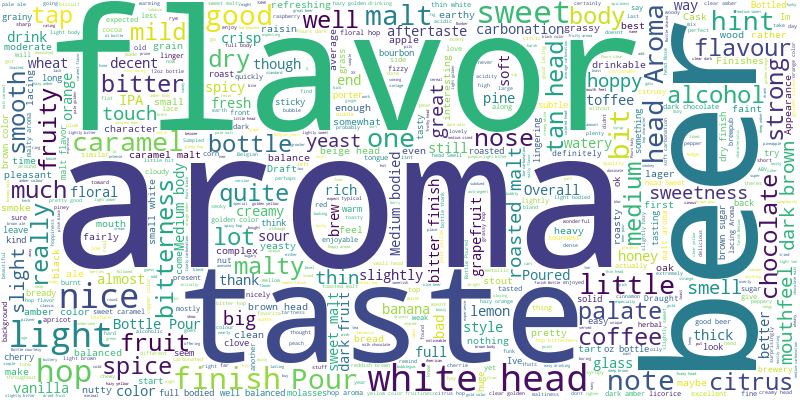

In [131]:
wordcloud.generate(joined_docs)

wordcloud.to_image()

In [60]:
def gen_words(texts):
    final = []
    for text in lemmatized_reviews:
        new = gensim.utils.simple_preprocess(text)
        final.append(new)
    return final

review_words = gen_words(lemmatized_reviews)

In [63]:
review_words[0]

['word', 'sum', 'beer', 'pale', 'gold', 'note', 'diacetyl', 'weak', 'grian']

In [64]:
lemmatized_reviews[0]

'word sum beer pale gold note diacetyl weak grian'

In [70]:
id2word = corpora.Dictionary(review_words)

In [71]:
vis_corpus = []
for text in review_words:
    new = id2word.doc2bow(text)
    vis_corpus.append(new)

In [72]:
vis_corpus[0]

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]

In [73]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=vis_corpus, 
                                            id2word=id2word, 
                                            num_topics=5, 
                                            random_state=55, 
                                            update_every=1, 
                                            passes=10)

In [74]:
lda_model.print_topics()

[(0,
  '0.037*"dark" + 0.034*"chocolate" + 0.034*"brown" + 0.023*"coffee" + 0.023*"head" + 0.021*"malt" + 0.020*"roasted" + 0.019*"pour" + 0.018*"black" + 0.014*"sweet"'),
 (1,
  '0.038*"light" + 0.036*"head" + 0.027*"white" + 0.024*"sweet" + 0.022*"medium" + 0.019*"body" + 0.018*"aroma" + 0.017*"pour" + 0.017*"finish" + 0.013*"malt"'),
 (2,
  '0.053*"hop" + 0.028*"nice" + 0.027*"head" + 0.026*"malt" + 0.021*"very" + 0.021*"aroma" + 0.017*"finish" + 0.017*"bitter" + 0.016*"hoppy" + 0.015*"flavor"'),
 (3,
  '0.023*"hop" + 0.021*"head" + 0.019*"fruit" + 0.017*"sweet" + 0.016*"caramel" + 0.014*"note" + 0.013*"white" + 0.013*"finish" + 0.012*"dry" + 0.011*"alcohol"'),
 (4,
  '0.037*"beer" + 0.020*"very" + 0.017*"good" + 0.017*"taste" + 0.012*"flavor" + 0.011*"well" + 0.010*"more" + 0.010*"much" + 0.009*"just" + 0.009*"really"')]

In [75]:
doc_topics = [doc for doc in lda_model[review_corpus]]

doc_topics[0:5]

[[(0, 0.23368208),
  (1, 0.023084637),
  (2, 0.35550776),
  (3, 0.02454181),
  (4, 0.3631837)],
 [(0, 0.11001997),
  (1, 0.086598985),
  (2, 0.33040255),
  (3, 0.26340124),
  (4, 0.20957722)],
 [(0, 0.11854624),
  (1, 0.13676324),
  (2, 0.13667029),
  (3, 0.21030648),
  (4, 0.39771375)],
 [(0, 0.19557343),
  (1, 0.174036),
  (2, 0.23916611),
  (3, 0.095402636),
  (4, 0.29582185)],
 [(0, 0.21054117),
  (1, 0.011763808),
  (2, 0.3019768),
  (3, 0.012296702),
  (4, 0.4634215)]]

In [77]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, 
                                     vis_corpus, 
                                     id2word, 
                                     mds='mmds', 
                                     R=30)

In [78]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.114448  0.223284       1        1  28.665968
1     -0.039820 -0.166124       2        1  24.273530
2     -0.134098 -0.030261       3        1  16.758675
0      0.222177 -0.074317       4        1  16.465989
3      0.066189  0.047417       5        1  13.835837, topic_info=          Term         Freq        Total Category  logprob  loglift
73         hop  4180.000000  4180.000000  Default  30.0000  30.0000
16   chocolate  1713.000000  1713.000000  Default  29.0000  29.0000
13       brown  2120.000000  2120.000000  Default  28.0000  28.0000
21        dark  2411.000000  2411.000000  Default  27.0000  27.0000
17      coffee  1152.000000  1152.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
56      bottle   305.243930  2229.914521   Topic5  -4.9141  -0.0107
178     bitter   288.931496  2113.240953   Topic5  -4.9690  -0.0119
25      flavor   314.687191  3473.881318   Topic5  -4.8836  -0.4235
200       body   274.515347  2401.744748   Topic5  -5.0202  -0.1910
167       well   254.062567  1861.171761   Topic5  -5.0976  -0.0135

[401 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
517       4  0.959605   acetic
1628      5  0.963259   active
92        1  0.227536  alcohol
92        2  0.112978  alcohol
92        3  0.004740  alcohol
...     ...       ...      ...
254       1  0.008233   yellow
254       2  0.898566   yellow
254       3  0.092915   yellow
1630      2  0.980645     zest
1630      3  0.015087     zest

[807 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 3, 1, 4])

In [111]:
doc_topics_df = pd.DataFrame(doc_topics)

doc_topics_df.head()

,0,1,2,3,4
0,"(0, 0.59292156)","(1, 0.35013255)","(2, 0.0187061)","(3, 0.018807774)","(4, 0.019432023)"
1,"(0, 0.030909082)","(1, 0.11267887)","(2, 0.68056774)","(3, 0.17259492)",None
2,"(0, 0.40777254)","(1, 0.3660995)","(2, 0.03221738)","(3, 0.13242011)","(4, 0.061490517)"
3,"(1, 0.2796046)","(2, 0.24709155)","(3, 0.06568038)","(4, 0.40192166)",None
4,"(1, 0.72299826)","(2, 0.2592773)",None,None,None


In [112]:
doc_topics_df.dtypes

0    object
1    object
2    object
3    object
4    object
dtype: object

In [113]:
import numpy as np

doc_topics_df = doc_topics_df.fillna(value=np.nan)

In [116]:
doc_topics_df.fillna('(0, 0.0)', inplace=True)

In [117]:
doc_topics_df.head()

,0,1,2,3,4
0,"(0, 0.59292156)","(1, 0.35013255)","(2, 0.0187061)","(3, 0.018807774)","(4, 0.019432023)"
1,"(0, 0.030909082)","(1, 0.11267887)","(2, 0.68056774)","(3, 0.17259492)","(0, 0.0)"
2,"(0, 0.40777254)","(1, 0.3660995)","(2, 0.03221738)","(3, 0.13242011)","(4, 0.061490517)"
3,"(1, 0.2796046)","(2, 0.24709155)","(3, 0.06568038)","(4, 0.40192166)","(0, 0.0)"
4,"(1, 0.72299826)","(2, 0.2592773)","(0, 0.0)","(0, 0.0)","(0, 0.0)"


In [118]:
test = doc_topics_df.applymap(lambda x: x[1])

In [121]:
test2 = test.applymap(lambda x: float(x))

In [124]:
test2.head()

,0,1,2,3,4
0,0.592922,0.350133,0.018706,0.018808,0.019432
1,0.030909,0.112679,0.680568,0.172595,0.000000
2,0.407773,0.366100,0.032217,0.132420,0.061491
3,0.279605,0.247092,0.065680,0.401922,0.000000
4,0.722998,0.259277,0.000000,0.000000,0.000000


In [125]:
doc_topics = test2

In [129]:
doc_topics.columns = ['dark', 'light', 'hoppy', 'sweet', 'quality']

doc_topics.head(15)

,dark,light,hoppy,sweet,quality
0,0.592922,0.350133,0.018706,0.018808,0.019432
1,0.030909,0.112679,0.680568,0.172595,0.000000
2,0.407773,0.366100,0.032217,0.132420,0.061491
3,0.279605,0.247092,0.065680,0.401922,0.000000
4,0.722998,0.259277,0.000000,0.000000,0.000000
5,0.579514,0.397905,0.000000,0.000000,0.000000
6,0.100843,0.878813,0.000000,0.000000,0.000000
7,0.373706,0.168889,0.447308,0.000000,0.000000
8,0.353995,0.010719,0.613850,0.010801,0.010635
9,0.014616,0.547794,0.408192,0.014507,0.014891


In [132]:
doc_topics.shape

(10000, 5)

---

### Recommendation System

In [140]:
final_data = pd.concat([reviews, doc_topics], axis=1)
final_data.drop(['review', 'username'], axis=1, inplace=True)

In [141]:
final_data.head()

,beer_id,appearance_rate,aroma_rate,palate_rate,taste_rate,ovr_rate,dark,light,hoppy,sweet,quality
0,103804,4.0,2.0,4.0,2.0,1.5,0.592922,0.350133,0.018706,0.018808,0.019432
1,104018,8.0,9.0,8.0,8.0,8.0,0.030909,0.112679,0.680568,0.172595,0.000000
2,968,6.0,6.0,6.0,6.0,6.0,0.407773,0.366100,0.032217,0.132420,0.061491
3,21662,8.0,7.0,6.0,5.0,7.0,0.279605,0.247092,0.065680,0.401922,0.000000
4,5923,10.0,10.0,10.0,10.0,10.0,0.722998,0.259277,0.000000,0.000000,0.000000


In [142]:
final_data.dtypes

beer_id              int64
appearance_rate    float64
aroma_rate         float64
palate_rate        float64
taste_rate         float64
ovr_rate           float64
dark               float64
light              float64
hoppy              float64
sweet              float64
quality            float64
dtype: object

In [146]:
items = final_data.groupby('beer_id').mean()

In [147]:
items.head()

,appearance_rate,aroma_rate,palate_rate,taste_rate,ovr_rate,dark,light,hoppy,sweet,quality
beer_id,,,,,,,,,,
1,8.000000,5.750000,7.0,7.25,7.125,0.104287,0.495959,0.266394,0.120882,0.010601
2,6.400000,5.200000,5.2,5.80,5.800,0.391368,0.401949,0.017982,0.169788,0.008242
3,6.000000,5.000000,6.0,5.00,6.500,0.272661,0.105241,0.083412,0.529420,0.000000
5,6.666667,6.333333,6.0,6.00,6.500,0.343679,0.444562,0.167711,0.030253,0.000000
6,6.000000,5.000000,6.0,6.00,5.500,0.016955,0.548464,0.400268,0.016939,0.017374


In [180]:
items.reset_index(inplace=True)

In [181]:
beers.head()

,beer_id,beer_name,brewer_id,abv,style
6277,1,Beamish Irish Stout,184,4.10,Dry Stout
2285,2,Abita Amber Lager,1,5.00,Vienna
1328,3,Abita Andygator,1,8.00,Heller Bock
4917,5,Abita Christmas Ale,1,6.13,Amber Ale
4721,6,Abita Fall Fest,1,6.13,Oktoberfest/Mrzen


In [199]:
items_final = items.merge(beers, left_on='beer_id', right_on='beer_id')

In [200]:
items_final.drop(['brewer_id'], axis=1, inplace=True)

In [201]:
items_final.head()

,beer_id,appearance_rate,aroma_rate,palate_rate,taste_rate,ovr_rate,dark,light,hoppy,sweet,quality,beer_name,abv,style
0,1,8.000000,5.750000,7.0,7.25,7.125,0.104287,0.495959,0.266394,0.120882,0.010601,Beamish Irish Stout,4.10,Dry Stout
1,2,6.400000,5.200000,5.2,5.80,5.800,0.391368,0.401949,0.017982,0.169788,0.008242,Abita Amber Lager,5.00,Vienna
2,3,6.000000,5.000000,6.0,5.00,6.500,0.272661,0.105241,0.083412,0.529420,0.000000,Abita Andygator,8.00,Heller Bock
3,5,6.666667,6.333333,6.0,6.00,6.500,0.343679,0.444562,0.167711,0.030253,0.000000,Abita Christmas Ale,6.13,Amber Ale
4,6,6.000000,5.000000,6.0,6.00,5.500,0.016955,0.548464,0.400268,0.016939,0.017374,Abita Fall Fest,6.13,Oktoberfest/Mrzen


In [202]:
items_final = items_final[['ovr_rate', 'dark', 'light', 'hoppy', 'sweet', 'quality', 'abv', 'beer_id', 'beer_name', 'style']]

In [203]:
items_final.head()

,ovr_rate,dark,light,hoppy,sweet,quality,abv,beer_id,beer_name,style
0,7.125,0.104287,0.495959,0.266394,0.120882,0.010601,4.10,1,Beamish Irish Stout,Dry Stout
1,5.800,0.391368,0.401949,0.017982,0.169788,0.008242,5.00,2,Abita Amber Lager,Vienna
2,6.500,0.272661,0.105241,0.083412,0.529420,0.000000,8.00,3,Abita Andygator,Heller Bock
3,6.500,0.343679,0.444562,0.167711,0.030253,0.000000,6.13,5,Abita Christmas Ale,Amber Ale
4,5.500,0.016955,0.548464,0.400268,0.016939,0.017374,6.13,6,Abita Fall Fest,Oktoberfest/Mrzen


In [204]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim_data = pd.DataFrame(cosine_similarity(items_final.iloc[:, 0:-3]))

In [205]:
cos_sim_data

,0,1,2,3,4,5,6,7,8,9,...,6344,6345,6346,6347,6348,6349,6350,6351,6352,6353
0,1.000000,0.980993,0.931628,0.972343,0.950074,0.991049,0.967196,0.983702,0.994514,0.995981,...,0.973215,0.981779,0.832878,0.997969,0.865456,0.949435,0.997523,0.997380,0.999169,0.843805
1,0.980993,1.000000,0.982813,0.998615,0.989305,0.997347,0.996390,0.999509,0.990016,0.993282,...,0.998020,0.998540,0.921203,0.986080,0.754716,0.991737,0.987894,0.966703,0.983318,0.929361
2,0.931628,0.982813,1.000000,0.989232,0.994904,0.971140,0.992985,0.981214,0.957132,0.956814,...,0.990154,0.980286,0.973913,0.941511,0.628096,0.995284,0.945065,0.908924,0.936650,0.976820
3,0.972343,0.998615,0.989232,1.000000,0.995298,0.994539,0.998188,0.998092,0.985913,0.987747,...,0.999011,0.997902,0.937246,0.978655,0.726666,0.995644,0.981134,0.956228,0.974233,0.944971
4,0.950074,0.989305,0.994904,0.995298,1.000000,0.983023,0.995959,0.988295,0.971119,0.969746,...,0.994323,0.990348,0.961747,0.956897,0.668851,0.994322,0.963013,0.929717,0.951285,0.967792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6349,0.949435,0.991737,0.995284,0.995644,0.994322,0.981302,0.994058,0.990024,0.969288,0.972833,...,0.993893,0.988319,0.957962,0.960659,0.672271,1.000000,0.960660,0.929641,0.953375,0.963764
6350,0.997523,0.987894,0.945065,0.981134,0.963013,0.995023,0.976465,0.988986,0.993089,0.996594,...,0.980593,0.990252,0.856544,0.995291,0.836550,0.960660,1.000000,0.990135,0.996799,0.869501
6351,0.997380,0.966703,0.908924,0.956228,0.929717,0.980670,0.950045,0.971231,0.989661,0.989245,...,0.958132,0.967051,0.798773,0.994728,0.894375,0.929641,0.990135,1.000000,0.995818,0.808969
6352,0.999169,0.983318,0.936650,0.974233,0.951285,0.991555,0.970236,0.985793,0.994119,0.996626,...,0.975907,0.982862,0.837925,0.997826,0.858597,0.953375,0.996799,0.995818,1.000000,0.848358


In [211]:
indexes = cos_sim_data.loc[2].sort_values(ascending=False).index.tolist()[1:4]

In [212]:
items_final['beer_name'].loc[indexes]

1198                    Petrus Triple
6225      Magic Rock Human Cannonball
5242    Kuhnhenn Confusion Double IPA
Name: beer_name, dtype: object

In [238]:
def get_recommendations(index):
    index_recomm = cos_sim_data.loc[index].sort_values(ascending=False).index.tolist()[1:4]
    beer_recomm = items_final['beer_name'].loc[index_recomm].values
    result = {'Original Beer': items_final['beer_name'].loc[index], 'Original Style': items_final['style'].loc[index], 'Recommended Beers': beer_recomm, 'IDs': items_final['beer_id'].loc[index_recomm].values, 'Style': items_final['style'].loc[index_recomm].values}
    return result

In [284]:
results = get_recommendations(34)

In [287]:
recs = pd.DataFrame(results)

In [288]:
recs

,Original Beer,Original Style,Recommended Beers,IDs,Style
0,Avery New World Porter,Porter,Heavy Seas Black Cannon,134469,Black IPA
1,Avery New World Porter,Porter,Granite City Broad Axe Stout,16261,Dry Stout
2,Avery New World Porter,Porter,Deschutes Hop in the Dark CDA,119389,Black IPA


In [328]:
results2 = get_recommendations(19)

In [329]:
recs2 = pd.DataFrame(results2)

In [330]:
recs2

,Original Beer,Original Style,Recommended Beers,IDs,Style
0,Anchor Steam Beer,California Common,Thornbridge Kipling,63578,American Pale Ale
1,Anchor Steam Beer,California Common,Ramstein Classic,3400,Dunkelweizen
2,Anchor Steam Beer,California Common,Moat Mountain Bear Peak Brown,18742,Brown Ale


---